In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/cleaned_data.csv")

#formatting
df.rename(columns = {'status_group':'status'}, inplace = True)
df['status'] = pd.Categorical(df['status'], ['functional','functional needs repair','non functional'])

### Map per class

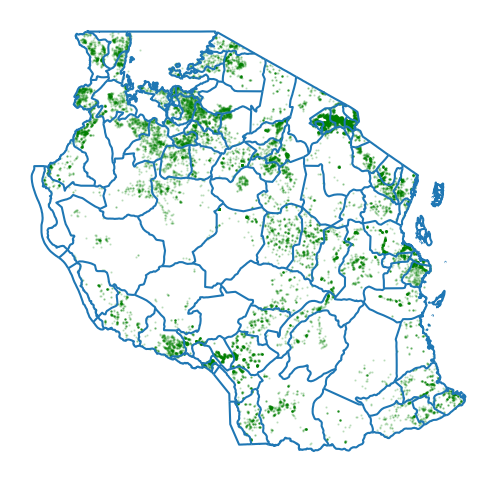

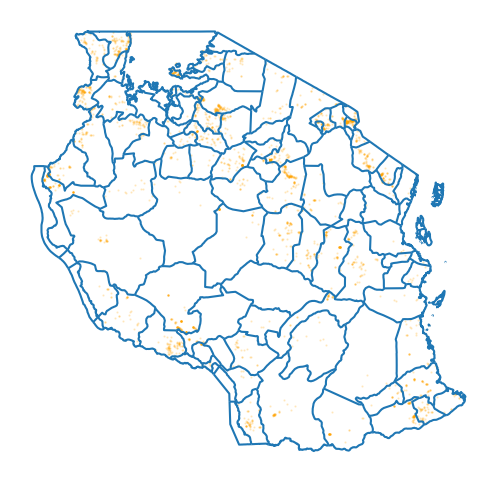

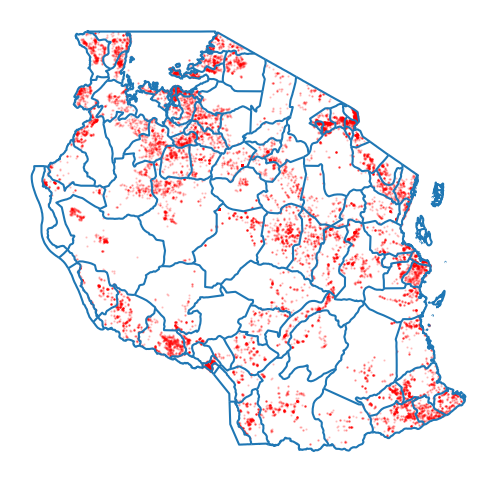

In [3]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")
#tan_map.plot()
col = ["green", "orange", "red"]
for i, cls in enumerate(["functional", "functional needs repair", "non functional"]):
    P = gdc[gdc["status"] == cls].plot(ax=tan_map.plot(figsize=(10, 6)), marker='o', color=col[i], markersize=0.4, alpha = 0.2)
    P.set_facecolor((255/255,255/255,255/255))
    plt.axis('off')
    plt.grid(visible=False)
    plt.savefig(f'data/maps/tan_map-{cls}.png', transparent=True)
plt.show()

### Extraction_type and Waterpoint_type

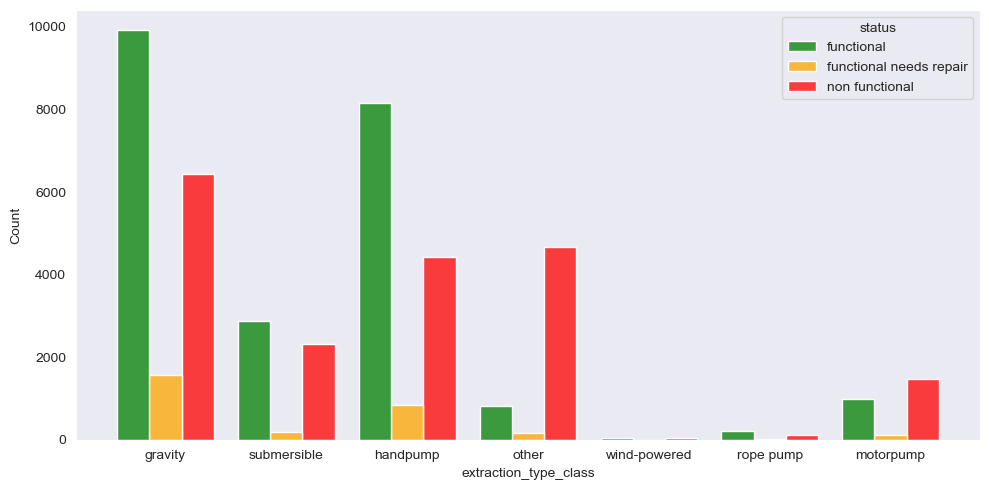

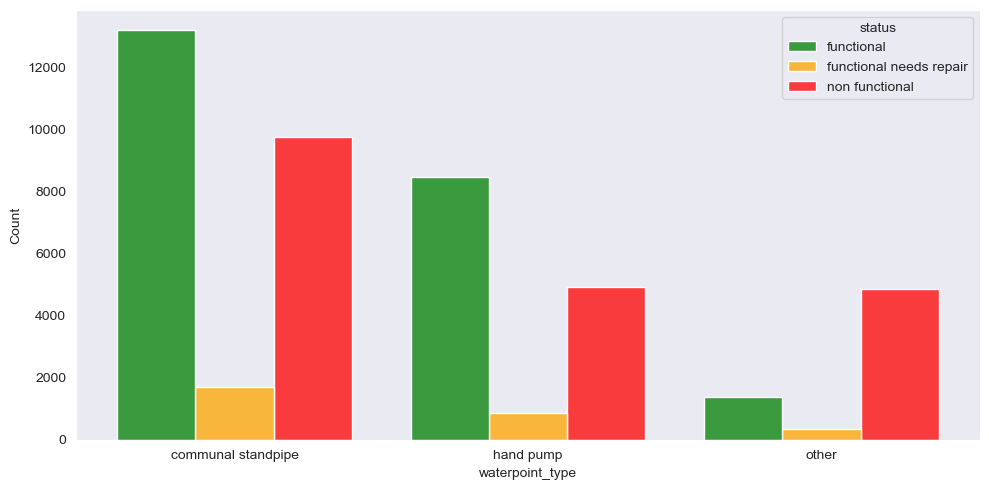

In [18]:
for att in ["extraction_type_class", "waterpoint_type"]:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[df[att].isin(df[att].value_counts().index)], x=att, hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
    plt.grid(visible=False)
    plt.tight_layout()
    plt.savefig(f"data/{att}-distribution.png",transparent=True)
    plt.show()

### Funder and Installer

Status distribution for the five "largest" funders (in terms of water pumps funded) and the five "largest" installers

funder


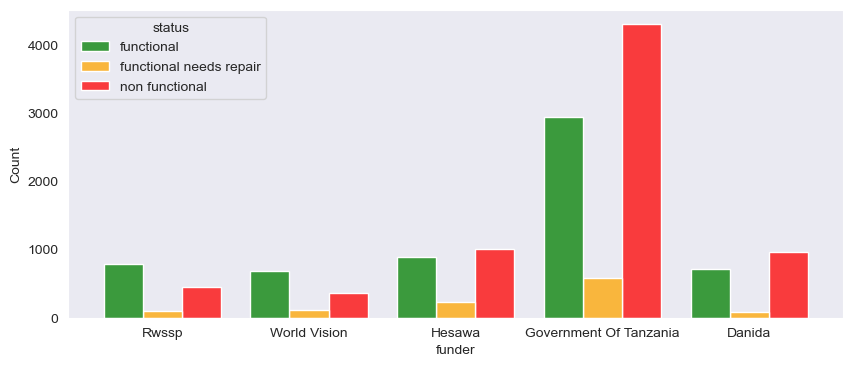

installer


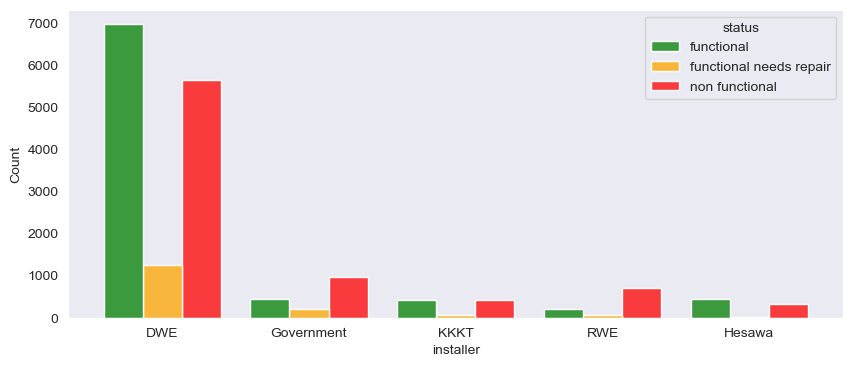

In [17]:
for att in ["funder", "installer"]:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df[df[att].isin(df[att].value_counts()[:5].index)], x=att, hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
    plt.grid(visible=False)
    plt.savefig(f"data/{att}-distribution.png",transparent=True)
    print(f"{att}")
    plt.show()

Print status distribution of selected funders

In [6]:
for funder in ["Hesawa", "Government Of Tanzania","Danida"]:
    print(f"Water pump status distribution of {funder}: \n", df[(df["funder"] == funder)]["status"].value_counts())


Water pump status distribution of Hesawa: 
 non functional             1013
functional                  895
functional needs repair     227
Name: status, dtype: int64
Water pump status distribution of Government Of Tanzania: 
 non functional             4312
functional                 2945
functional needs repair     588
Name: status, dtype: int64
Water pump status distribution of Danida: 
 non functional             965
functional                 721
functional needs repair     86
Name: status, dtype: int64


### Geoplots of selected funders and installers

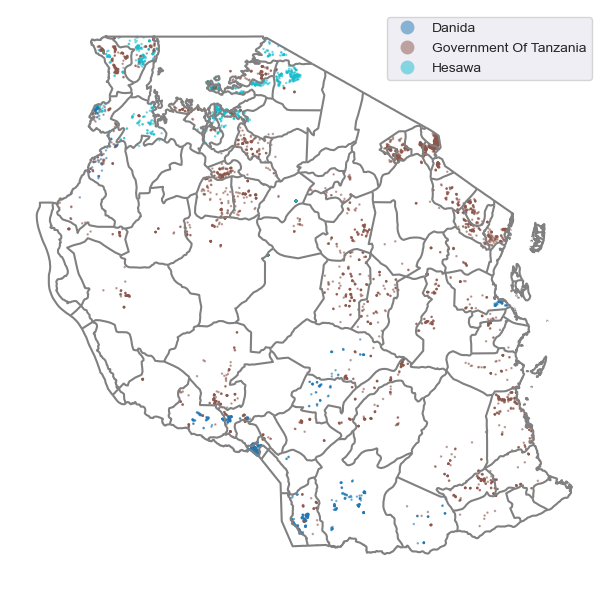

In [7]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6), color="grey")

gdc[(gdc["funder"].isin(["Hesawa", "Government Of Tanzania", "Danida"])) & (gdc["status"] == "non functional")].plot(ax=ax, column="funder", cmap='tab10', marker='o', markersize=0.6, alpha = 0.5, legend=True)
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-funder.png', transparent=True)
plt.show()

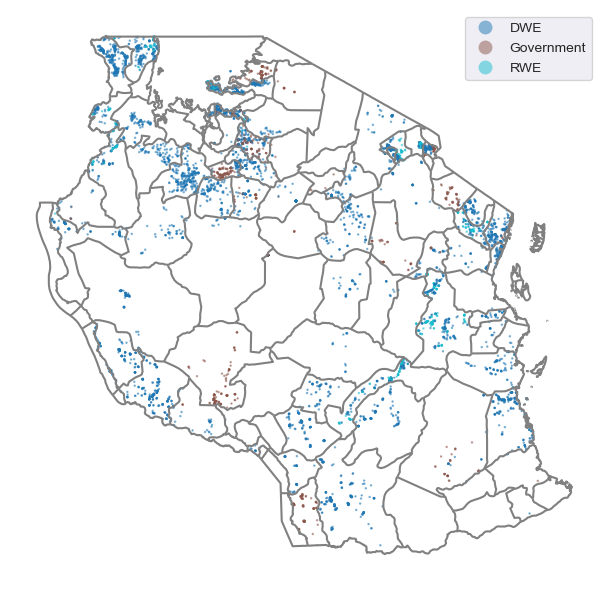

In [8]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6), color="grey")

gdc[(gdc["installer"].isin(["DWE", "Government", "RWE"])) & (gdc["status"] == "non functional")].plot(ax=ax, column="installer", cmap='tab10', marker='o', markersize=0.6, alpha = 0.5, legend=True)
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-installer.png', transparent=True)
plt.show()

### Basin

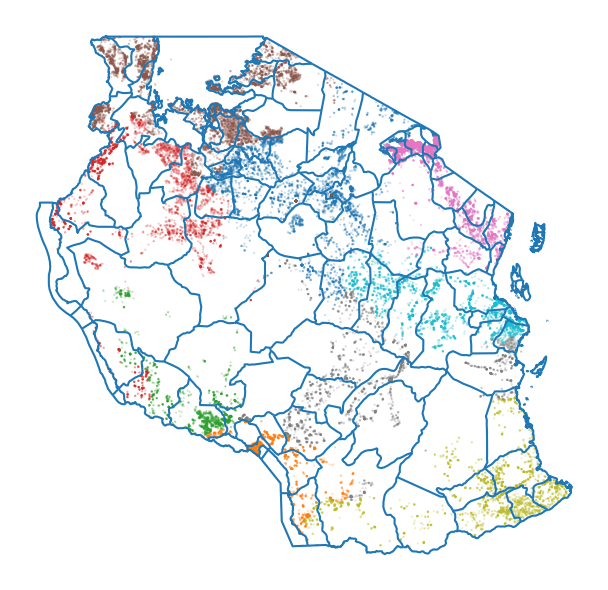

In [9]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6))

gdc.plot(ax=ax,column="basin", marker='o', markersize=0.4, alpha = 0.2)
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-basin.png', transparent=True)
plt.show()

### Quantity

Distribution Histplot

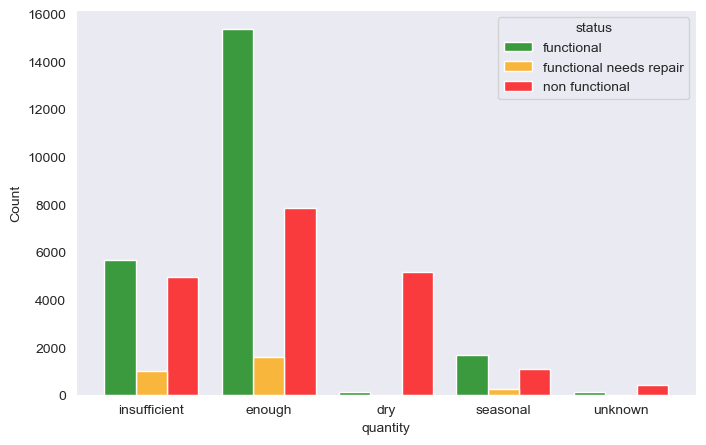

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df["quantity"].isin(df["quantity"].value_counts()[:5].index)], x="quantity", hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
plt.grid(visible=False)
plt.savefig("data/Quantity-distribution.png",transparent=True)
plt.show()

Water quantity distribution

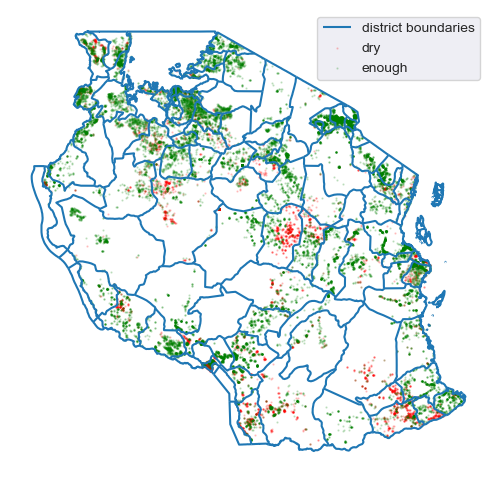

In [11]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_shapefile/TAN_boundaries.shp")

ax = tan_map.plot(figsize=(10, 6))

gdc[gdc["quantity"] == "dry"].plot(ax=ax,marker='o', color='red', markersize=0.4, alpha = 0.2)

gdc[gdc["quantity"] == "enough"].plot(ax=ax, marker='o', color='green', markersize=0.4, alpha = 0.2)

plt.legend(["district boundaries", "dry", "enough"])
plt.axis('off')
plt.grid(visible=False)
plt.savefig(f'data/maps/tan_map-quantity.png', transparent=True)
plt.show()

"Dry waterplaces vs Rivers" plot

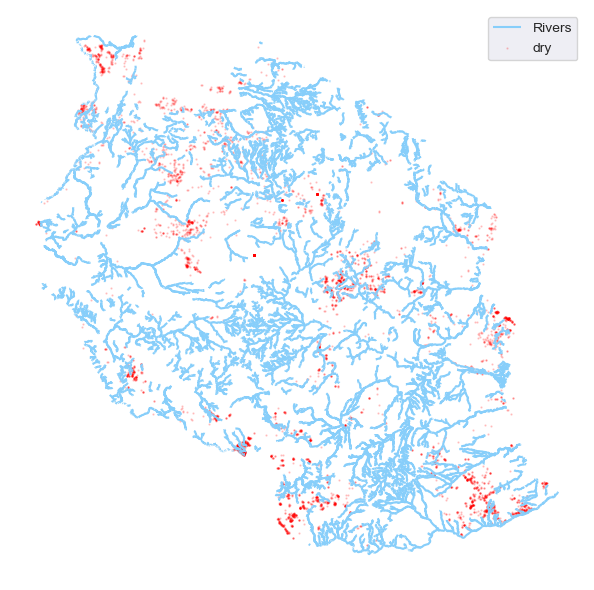

In [12]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdc = gpd.GeoDataFrame(df.copy(), geometry=geometry)
tan_map = gpd.read_file("data/maps/TAN_river_shapefile/AFRICOVER_TZ_RIVERS.shp")

ax = tan_map.plot(figsize=(10, 6), color="lightskyblue")

gdc[gdc["quantity"] == "dry"].plot(ax=ax,marker='o', color='red', markersize=0.4, alpha = 0.2)

plt.legend(["Rivers", "dry"])
plt.axis('off')
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(f'data/maps/tan_map-quantity_rivers.png', transparent=True)
plt.show()

### Danida Water Source analysis
Print out the rate of non functioning water pumps funded by Danida per source type

In [13]:
def non_func_rates(entity):
    x = df[(df["funder"] == entity)]["source"].value_counts()[:4]
    x_nonfunc = df[(df["funder"] == entity) & (df["status"] != "non functional")]["source"].value_counts()[:4]

    print(x)
    print(f"Rate of functional water pumps: \n", pd.Series(dict(zip(x.index,[i[1]/i[0] for i in zip(x,x_nonfunc)]))))

non_func_rates("Danida")

spring          880
river           443
shallow well    261
machine dbh     144
Name: source, dtype: int64
Rate of functional water pumps: 
 spring          0.355682
river           0.555305
shallow well    0.582375
machine dbh     0.465278
dtype: float64


### Government of Tanzania Water Source analysis

In [14]:
non_func_rates("Government Of Tanzania")

spring          3354
machine dbh     1337
shallow well    1229
river           1045
Name: source, dtype: int64
Rate of functional water pumps: 
 spring          0.544425
machine dbh     0.365744
shallow well    0.387307
river           0.436364
dtype: float64


### Hesawa Water Source analysis

In [15]:
non_func_rates("Hesawa")

shallow well            1484
spring                   317
machine dbh              114
rainwater harvesting     112
Name: source, dtype: int64
Rate of functional water pumps: 
 shallow well            0.483154
spring                  0.646688
machine dbh             0.570175
rainwater harvesting    0.562500
dtype: float64


### Payment Type

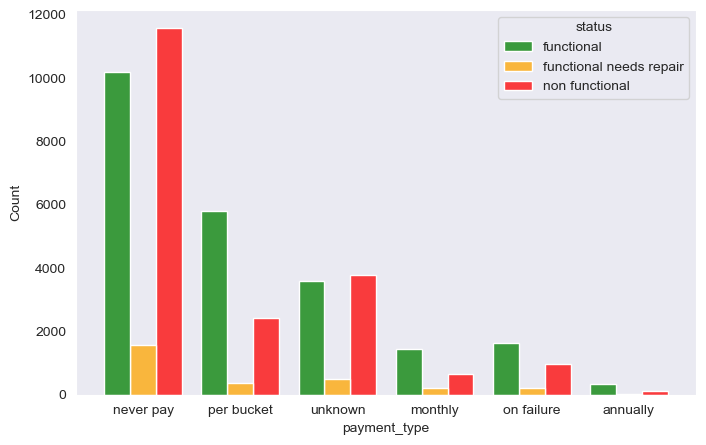

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df["payment_type"].isin(df["payment_type"].value_counts().index)], x="payment_type", hue="status", multiple="dodge", shrink=0.8, palette=["g", "orange", "r"])
plt.grid(visible=False)
plt.savefig("data/Payment-distribution.png",transparent=True)
plt.show()